# HMS Capstone - Exploratory Analysis 2
## By: AJ Goldstein (https://github.com/ajva1996)

### <span style="color:red">Analysis Goals: </span>
### 1) Investigate the <span style="color:red">distribution of mental health outcomes </span>(e.g. depression, anxiety) across the sample.
### 2) Investigate the <span style="color:red">interrelationship of mental health outcomes </span>(e.g. depression <-> anxiety) across the sample.
### 3) Investigate the <span style="color:red">correlational relationship</span> between mental health outcomes and psychological inflexibility.

In [298]:
from __future__ import division
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='ajva1996', api_key='R15DvcmyHWuyA74rNGYh')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## STEP #0: Carry forward data from previous notebook

In [299]:
# cleaned dataset
%store -r HMS

# separated modules
%store -r HMS_ids
%store -r HMS_demo
%store -r HMS_mhstatus
%store -r HMS_mhhelp
%store -r HMS_aaq

# tidy variable groups
%store -r tidy_race
%store -r tidy_religion
%store -r tidy_degreeType
%store -r tidy_fieldOfStudy
%store -r tidy_activity
%store -r tidy_age
%store -r tidy_gender
%store -r tidy_relig

no stored variable HMS


---------------------------------------------------------------------------------------------------------------------

## STEP #1: Mental Health Outcomes (distribution)

### Variables of Interest:
1) deprawsc = depression
- Patient Health Questionnaire 9: https://www.uspreventiveservicestaskforce.org/Home/GetFileByID/218
- <b>Score range: 0-27</b> (nine questions rated 0-3)
- A higher score represents a person with worse depressive symptoms

2) anx_score = anxiety
- Generalized Anxiety Disorder 7: http://carybehavioralhealth.com/wp-content/uploads/2011/06/Generalized-Anxiety-Scale.pdf
- <b>Score Range: 0-21</b> (seven questions rated 0-3)
- A higher score represents a person with worse anxiety symptoms

3) flourish = psychological well-being
- Diener's Flourishing Scale: http://www.cliveleach.com/strengths/the-flourishing-scale/
- <b>Score range: 8-56 </b> (eight questions rated 1-7)
- A high score represents a person with better psychological well-being (PWB)

---------------------------------------------------------------------------------------------------------------------

### 1) Depression (i.e. deprawsc)

<img src="http://drive.google.com/uc?export=view&id=1NsyNsaSzdEHiePWFCmohWmK3vdsWwsOn" alt="Drawing" style="width: 700px;" align= "left">

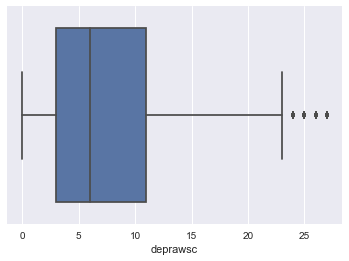

In [300]:
# birds' eye view
sns.boxplot(HMS.deprawsc.dropna());

In [301]:
# summary statistics
HMS.deprawsc.dropna().describe()

count    37251.000000
mean         7.701216
std          5.806325
min          0.000000
25%          3.000000
50%          6.000000
75%         11.000000
max         27.000000
Name: deprawsc, dtype: float64

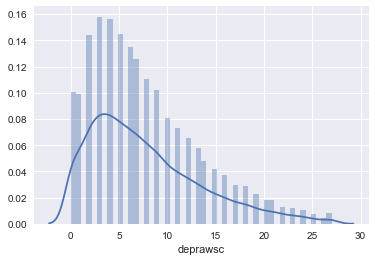

In [302]:
# detailed distribution
sns.distplot(HMS.deprawsc.dropna());

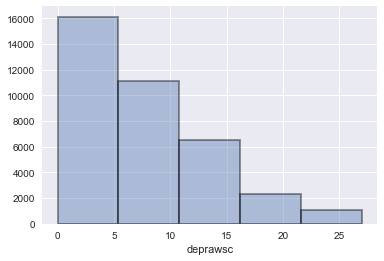

In [303]:
# bins represent depression severity levels
sns.distplot(HMS.deprawsc.dropna(), kde = False, bins = 5, hist_kws=dict(edgecolor="k", linewidth=2));

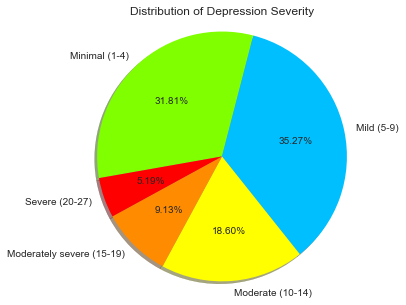

In [304]:
# pie chart of depression severity
dep = HMS.deprawsc.dropna()
labels = ['Minimal (1-4)', 'Mild (5-9)', 'Moderate (10-14)', 'Moderately severe (15-19)', 'Severe (20-27)']
dep_list = [round((x * 100), 2) for x in [len(dep[(dep >= 1) & (dep <= 4)])/len(dep),
                                          len(dep[(dep >= 5) & (dep <= 9)])/len(dep),
                                          len(dep[(dep >= 10) & (dep <= 14)])/len(dep),
                                          len(dep[(dep >= 15) & (dep <= 19)])/len(dep),
                                          len(dep[(dep >= 20) & (dep <= 27)])/len(dep)]]

colors = ['chartreuse', 'deepskyblue', 'yellow', 'darkorange', 'red']
fig = plt.pie(dep_list, labels=labels, colors=colors,
        autopct='%1.2f%%', startangle=190, shadow=True, counterclock = False)

fig = plt.gcf()
fig.set_size_inches(5,5)
plt.axis('equal')
plt.title('Distribution of Depression Severity')
plt.show()

### <span style="color:red">Key takeaways on college student depression scores</span>
- <span style="color:red"> the distribution of depression scores is fairly compact and right-skewed.
- <span style="color:red"> 25th percentile = 3.0 (minimal) // 50th percentile = 6.0 (mild) // 75th percentile = 11.0 (moderate) </span>


- <span style="color:red"> ~2/3 (67%) are minimally or mildly depressed</span>
- <span style="color:red"> ~1/5 (19%) are moderately depressed</span>
- <span style="color:red"> ~1/7 (14%) are severely depressed</span>

---------------------------------------------------------------------------------------------------------------------

### 2) Anxiety (i.e. anx_score)

<img src="http://drive.google.com/uc?export=view&id=1DNPCtbBAI-REKfsyQOCzxfRJEsS35OS2" alt="Drawing" style="width: 450px;" align= "left">

<img src= alt="Drawing" style="width: 700px;" align= "left">
https://drive.google.com/file/d//view?usp=sharing

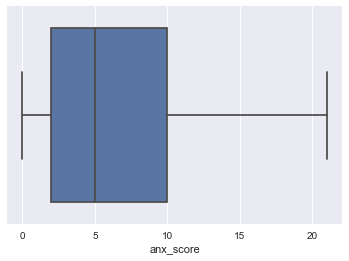

In [305]:
# birds' eye view
sns.boxplot(HMS.anx_score.dropna());

In [306]:
# summary statistics
HMS.anx_score.dropna().describe()

count    36868.000000
mean         6.707958
std          5.440851
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         21.000000
Name: anx_score, dtype: float64

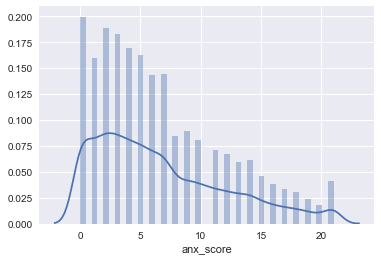

In [307]:
# detailed distribution
sns.distplot(HMS.anx_score.dropna());

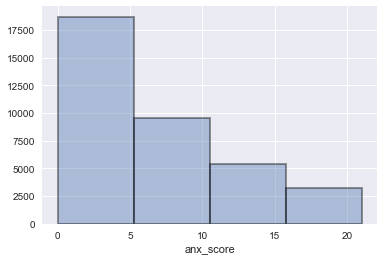

In [308]:
# bins represent anxiety severity levels
sns.distplot(HMS.anx_score.dropna(), kde = False, bins = 4, hist_kws=dict(edgecolor="k", linewidth=2));

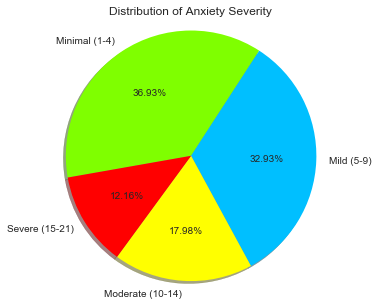

In [321]:
# pie chart of anxiety severity
anx = HMS.anx_score.dropna()
labels = ['Minimal (1-4)', 'Mild (5-9)', 'Moderate (10-14)', 'Severe (15-21)']
anx_list = [round((x * 100), 2) for x in [len(anx[(anx >= 1) & (anx <= 4)])/len(anx),
                                          len(anx[(anx >= 5) & (anx <= 9)])/len(anx),
                                          len(anx[(anx >= 10) & (anx <= 14)])/len(anx),
                                          len(anx[(anx >= 15) & (anx <= 21)])/len(anx)]]

colors = ['chartreuse', 'deepskyblue', 'yellow', 'red']
fig = plt.pie(anx_list, labels=labels, colors=colors,
        autopct='%1.2f%%', startangle=190, shadow=True, counterclock = False)

fig = plt.gcf()
fig.set_size_inches(5,5)
plt.axis('equal')
plt.title('Distribution of Anxiety Severity')
plt.show()

### <span style="color:red">Key takeaways on college student anxiety scores</span>
- <span style="color:red"> the distribution of depression scores is moderately compact and right-skewed.
- <span style="color:red"> 25th percentile = 2.0 (minimal) // 50th percentile = 5.0 (mild) // 75th percentile = 10.0 (moderate) </span>


- <span style="color:red"> ~2/3 (70%) are minimally or mildly anxious</span>
- <span style="color:red"> ~1/5 (18%) are moderately anxious</span>
- <span style="color:red"> ~1/8 (12%) are severely anxious</span>

---------------------------------------------------------------------------------------------------------------------

### 3) Psychological Well-Being (i.e. flourish)

#### Interpreting the score:
- The Flourishing Scale measures the respondent’s self-perceived success in important areas such as relationships, self-esteem, purpose, and optimism.
- The scale provides a single psychological well-being score (8-56) and can be used to provide useful feedback for how to improve one’s life.
- <span style="color:red">Limitation: there is no real-world interpretability associated with ranges of scores.</span>

In [ ]:
# birds' eye view
sns.boxplot(HMS.flourish.dropna());

In [310]:
# summary statistics
HMS.flourish.dropna().describe()

count    43016.000000
mean        44.127278
std          8.561844
min          8.000000
25%         40.000000
50%         46.000000
75%         50.000000
max         56.000000
Name: flourish, dtype: float64

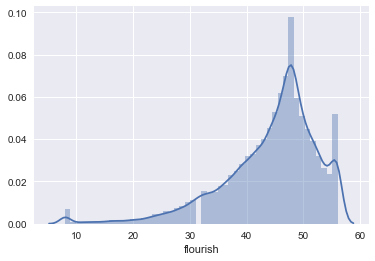

In [311]:
# detailed distribution
sns.distplot(HMS.flourish.dropna());

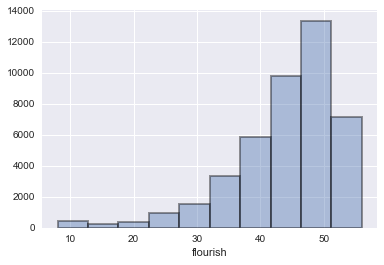

In [312]:
sns.distplot(HMS.flourish.dropna(), kde = False, bins = 10, hist_kws=dict(edgecolor="k", linewidth=2));

### <span style="color:red">Key takeaways on college student psychological well-being scores</span>
- <span style="color:red"> the distribution of scores is very compact and left-skewed.
- <span style="color:red"> 25th percentile = 40.0 (minimal) // 50th percentile = 46.0 (mild) // 75th percentile = 50.0 (moderate) </span>

---------------------------------------------------------------------------------------------------------------------

## STEP #2: Mental Health Outcomes (interrelationship)

<img src="images/correlation_interpretation.jpg" alt="Drawing" style="width: 500px;" align= "left">

### 1) Depression <-> Anxiety

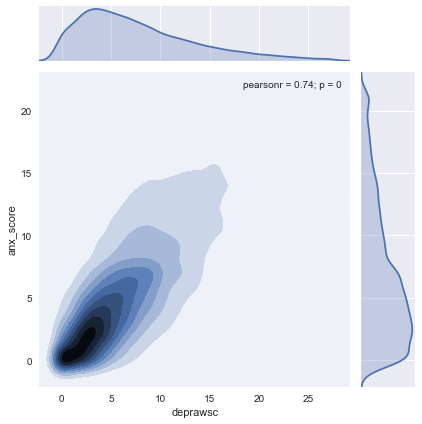

In [327]:
# kernal density estimate (KDE) with marginal distributions
sns.jointplot(x = 'deprawsc', y = 'anx_score', data=HMS_mhstatus, kind = 'kde');

### 2) Depression & Psychological Well-Being

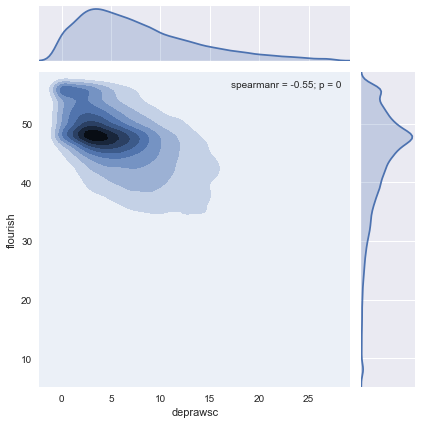

In [325]:
# same as above, now with spearman statistic rather than pearson
sns.jointplot(x = 'deprawsc', y = 'flourish', data=HMS_mhstatus, kind = 'kde', stat_func=spearmanr);

### 3) Anxiety & Psychological Well-Being

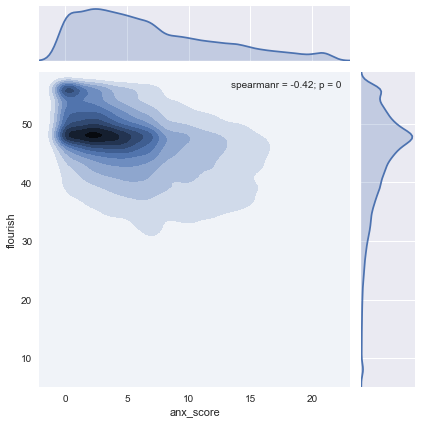

In [315]:
# same as #2 above (with spearman statistic)
sns.jointplot(x = 'anx_score', y = 'flourish', data=HMS_mhstatus, kind = 'kde', stat_func=spearmanr);

### <span style="color:red">Key takeaways on interrelationships of mental health outcomes </span>
- Depression <-> Anxiety:
    - <span style="color:red">STRONG POSITIVE </span>linear relationship ( r = 0.74, p-value = 0 )
    
    
- Depression <-> Psychological Well-Being:
    - <span style="color:red"> MODERATE NEGATIVE </span> linear relationship ( r = -0.55, p-value = 0 )
    
    
- Anxiety <-> Psychological Well-Being:
    - <span style="color:red"> MODERATE NEGATIVE </span> linear relationship ( r = -0.42, p-value = 0 )
    
#### Note: I chose spearman statistic over pearson for the last two because of an apparent monotonic (non-linear) relationship

---------------------------------------------------------------------------------------------------------------------

## STEP #3: Psychological Inflexibility and Mental Health Outcomes

### 1) AAQ <-> Depression

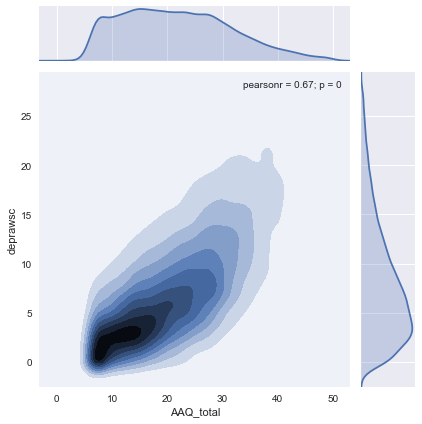

In [316]:
# kernal density estimate (KDE) with marginal distributions
sns.jointplot(x = HMS_aaq.AAQ_total, y = HMS.deprawsc, kind='kde');

### 2) AAQ <-> Anxiety

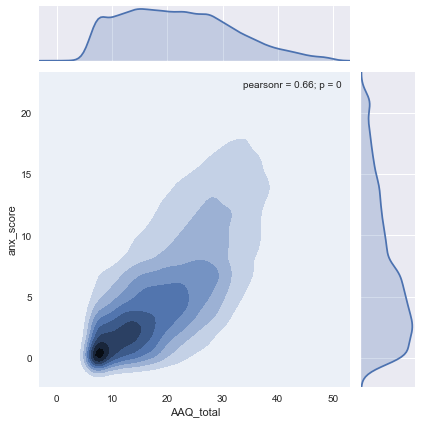

In [317]:
sns.jointplot(x = HMS_aaq.AAQ_total, y = HMS.anx_score, kind='kde');

### 3) AAQ <-> Well-Being

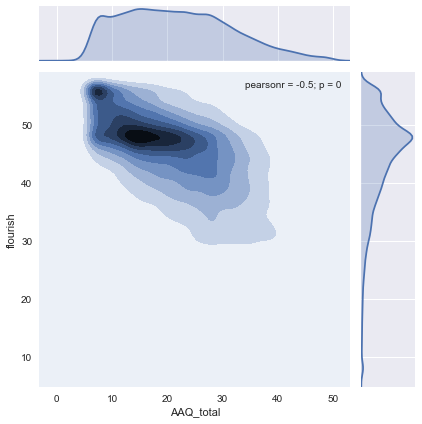

In [318]:
sns.jointplot(x = HMS_aaq.AAQ_total, y = HMS.flourish, kind='kde');

### <span style="color:red">Key takeaways on correlationship relationships: </span>

- AAQ <-> Depression:
    - <span style="color:red">STRONG POSITIVE </span> linear relationship ( r = 0.67, p-value = 0 )
    
    
- AAQ <-> Anxiety:
    - <span style="color:red"> STRONG POSITIVE </span> linear relationship ( r = 0.66, p-value = 0 )
    
    
- AAQ <-> Well-Being:
    - <span style="color:red"> MODERATE NEGATIVE </span> linear relationship ( r = -0.5, p-value = 0 )
    
### <span style="color:green">Psychological Inflexibility (AAQ) appears to be a strong predictor of mental health outcomes in college students.</span>

## STEP #4: Pass variables to next Jupyter notebook

In [319]:
# cleaned dataset
%store HMS

# separated modules
%store HMS_ids
%store HMS_demo
%store HMS_mhstatus
%store HMS_mhhelp
%store HMS_aaq

# tidy variable groups
%store tidy_race
%store tidy_religion
%store tidy_degreeType
%store tidy_fieldOfStudy
%store tidy_activity
%store tidy_age
%store tidy_gender
%store tidy_relig

Stored 'HMS' (DataFrame)
Stored 'HMS_ids' (DataFrame)
Stored 'HMS_demo' (DataFrame)
Stored 'HMS_mhstatus' (DataFrame)
Stored 'HMS_mhhelp' (DataFrame)
Stored 'HMS_aaq' (DataFrame)
Stored 'tidy_race' (DataFrame)
Stored 'tidy_religion' (DataFrame)
Stored 'tidy_degreeType' (DataFrame)
Stored 'tidy_fieldOfStudy' (DataFrame)
Stored 'tidy_activity' (DataFrame)
Stored 'tidy_age' (DataFrame)
Stored 'tidy_gender' (DataFrame)
Stored 'tidy_relig' (DataFrame)
